# Ferramenta para aprimorar qualidade de imagens coletadas pelo ALR
#### Referências: 
- https://stackoverflow.com/questions/52004133/how-to-improve-image-quality
- https://pypi.org/project/enhance/1.0/
 

In [1]:
from PIL import Image
import numpy as np

In [8]:
from skimage.morphology import opening
from skimage.morphology import disk
import cv2

In [2]:
# black = (0,0,0)
# white = (255,255,255)
# threshold = (220,220,220)

In [15]:
black = 0
white = 255
threshold = 200


In [13]:

img = Image.open("/run/media/sagauga/storage_wd_2/DriveShared/6 - Midia/fotos_de_acervos/OSEM_acervo_Cida-Guerra/editadas/editada_1.jpeg")

In [26]:
pixels = img.getdata()

In [27]:
newPixels = []


In [28]:
for pixel in pixels:
    if pixel < threshold:
        newPixels.append(black)
    else:
        newPixels.append(white)

# Create and save new image.
newImg = Image.new("RGB",img.size)
newImg.putdata(newPixels)
newImg.save("newImage.jpg")

In [16]:
pixels = np.array(img)[:,:,0]

# Remove pixels above threshold
pixels[pixels > threshold] = white
pixels[pixels < threshold] = black


# Morphological opening
blobSize = 1 # Select the maximum radius of the blobs you would like to remove
structureElement = disk(blobSize)  # you can define different shapes, here we take a disk shape
# We need to invert the image such that black is background and white foreground to perform the opening
pixels = np.invert(opening(np.invert(pixels), structureElement))


# Create and save new image.
newImg = Image.fromarray(pixels).convert('RGB')
newImg.save("newImage1.PNG")

# Find the connected components (black objects in your image)
# Because the function searches for white connected components on a black background, we need to invert the image
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(np.invert(pixels), connectivity=8)

# For every connected component in your image, you can obtain the number of pixels from the stats variable in the last
# column. We remove the first entry from sizes, because this is the entry of the background connected component
sizes = stats[1:,-1]
nb_components -= 1

# Define the minimum size (number of pixels) a component should consist of
minimum_size = 100

# Create a new image
newPixels = np.ones(pixels.shape)*255

# Iterate over all components in the image, only keep the components larger than minimum size
for i in range(1, nb_components):
    if sizes[i] > minimum_size:
        newPixels[output == i+1] = 0

# Create and save new image.
newImg = Image.fromarray(newPixels).convert('RGB')
newImg.save("newImage2.PNG")

In [19]:
from PIL import ImageEnhance

In [22]:
en = ImageEnhance._Enhance()

In [24]:
ic = ImageEnhance.Contrast(img)

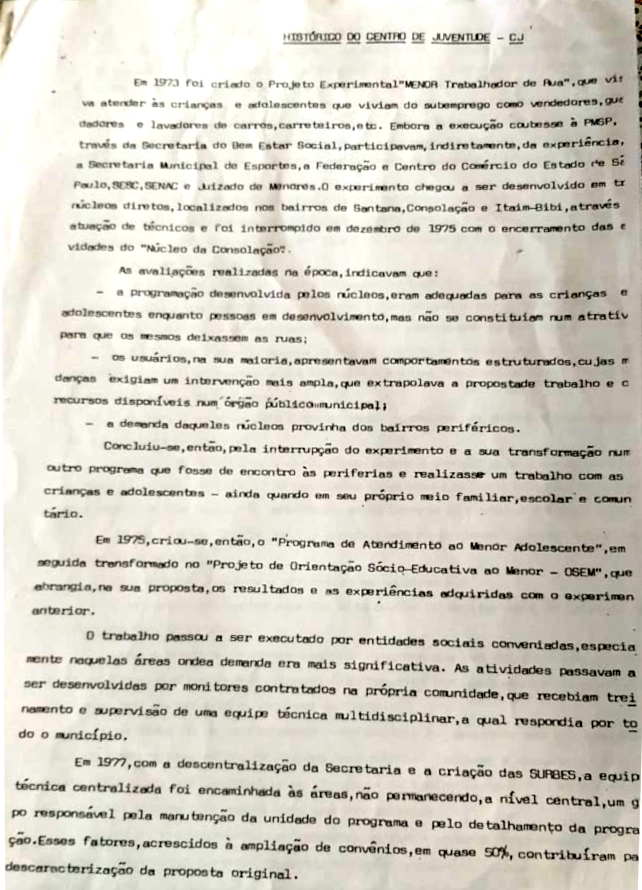

In [27]:
ic.enhance(2.5)